# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

## Importing Libraries

In [106]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

from tensorflow.keras.layers import Dropout
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

In [107]:
df = pd.read_csv('Bus_Breakdown_and_Delays.csv')
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [109]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [110]:
df.isnull().sum()

School_Year                             0
Busbreakdown_ID                         0
Run_Type                               89
Bus_No                                  0
Route_Number                           88
Reason                                102
Schools_Serviced                        0
Occurred_On                             0
Created_On                              0
Boro                                 6318
Bus_Company_Name                        0
How_Long_Delayed                    21630
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    142340
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64

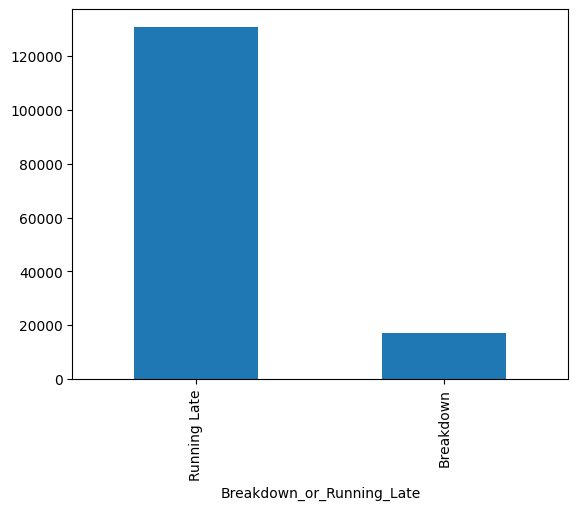

In [111]:
df['Breakdown_or_Running_Late'].value_counts().plot.bar(rot=90);

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [112]:
#Handling Missing Values
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
imputer_mean = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_mean.fit_transform(df[numerical_cols])

categorical_cols = df.select_dtypes(include=['object']).columns
imputer_mode = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_mode.fit_transform(df[categorical_cols])


In [113]:
df.duplicated().sum()

0

In [114]:
label_encoder = LabelEncoder()

df_encoded = df.copy()
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

corr_matrix = df_encoded.corr()

churn_corr = corr_matrix['Breakdown_or_Running_Late'].sort_values(ascending=False)

churn_corr


Breakdown_or_Running_Late          1.000000
How_Long_Delayed                   0.134643
Have_You_Alerted_OPT               0.049623
Has_Contractor_Notified_Schools    0.028518
Bus_No                             0.021246
Schools_Serviced                   0.019284
Number_Of_Students_On_The_Bus      0.007790
Has_Contractor_Notified_Parents    0.006987
Last_Updated_On                    0.001636
Informed_On                        0.001362
Created_On                         0.001362
Occurred_On                        0.001315
Busbreakdown_ID                   -0.009859
Incident_Number                   -0.011119
School_Year                       -0.015079
Boro                              -0.027367
Bus_Company_Name                  -0.035979
Run_Type                          -0.037523
School_Age_or_PreK                -0.119019
Route_Number                      -0.141957
Reason                            -0.330754
Name: Breakdown_or_Running_Late, dtype: float64

In [115]:
df_encoded.drop(columns=['Number_Of_Students_On_The_Bus',"Has_Contractor_Notified_Parents","Last_Updated_On","Informed_On","Created_On","Occurred_On","Busbreakdown_ID"], inplace=True)

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [116]:
X = df_encoded.drop('Breakdown_or_Running_Late', axis=1)
y = df_encoded['Breakdown_or_Running_Late']

#make vall and train and test
X_, X_test, y_, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size=0.2, random_state=42)




## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [158]:
model = Sequential()
model.add(Dense(units=8, input_dim=X_train.shape[1], kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','recall','precision'])

model.summary()

c:\Users\wwwwe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_56 (Dense)                │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215 (860.00 B)

 Trainable params: 215 (860.00 B)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [159]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2)

Epoch 1/10
7576/7576 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8778 - loss: 0.3353 - precision: 0.8817 - recall: 0.9948 - val_accuracy: 0.8865 - val_loss: 0.2074 - val_precision: 0.8865 - val_recall: 1.0000
Epoch 2/10
7576/7576 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.8813 - loss: 0.2094 - precision: 0.8965 - recall: 0.9788 - val_accuracy: 0.8993 - val_loss: 0.1817 - val_precision: 0.9336 - val_recall: 0.9543
Epoch 3/10
7576/7576 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9000 - loss: 0.1915 - precision: 0.9489 - recall: 0.9369 - val_accuracy: 0.9317 - val_loss: 0.1580 - val_precision: 0.9736 - val_recall: 0.9487
Epoch 4/10
7576/7576 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9043 - loss: 0.1822 - precision: 0.9531 - recall: 0.9377 - val_accuracy: 0.9203 - val_loss: 0.1677 - val_precision: 0.9724 - val_recall: 0.9367
Epoch 5/10
7576/7576 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9110 - loss: 0.1735 - precision: 0.9574 - recall: 0.9411 - val_accuracy: 0.8798

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [160]:
# Evaluate the model
model.evaluate(X_test, y_test)

925/925 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9163 - loss: 0.1739 - precision: 0.9804 - recall: 0.9240


[0.17696203291416168,
 0.9121473431587219,
 0.9199710488319397,
 0.9797574281692505]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [161]:
val = model.predict(X_val[0:4])
val

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[0.49240223],
       [0.9985951 ],
       [1.        ],
       [0.98815715]], dtype=float32)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

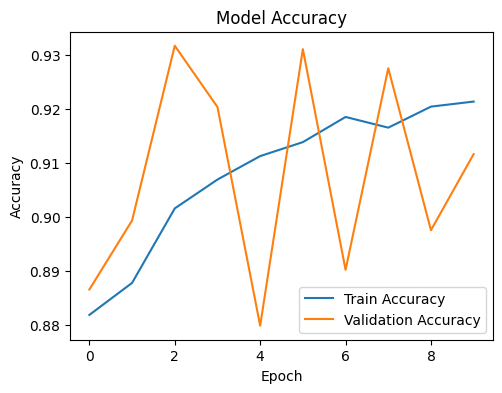

In [164]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

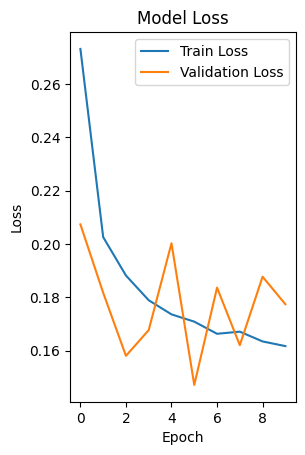

In [165]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()

## Save the Model
Save the trained model for submission.

In [163]:
model.save('model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1. i used label encoding
2. i used 8 ,6 ,6, 1 layers i tried multiple node configuration and that was the best configuration
3. i tried multiple values and ended up on batch_size=10, epochs=10 i think the model will improve if a make the epochs more than 40
4. i made the problem as a binary with one output and i used binary_crossentropy and accuracy and recall and precision to make sure 
5. no i did not have the need to use any
6. the model did very good on production with a accuracy of 91% and recall of 92% 
7. yes i tried multiple node configuration for the model not to Overfitting or Underfitting 
8. i didn't have Overfitting or Underfitting if i hade Underfitting ill have mode nodes on the model and more training and the opposite for Underfitting